# Lab 8: Supervised Learning  

In this lab, we will keep working on supervised learning. We will first learn how to train decision trees and we will see that doing this using `sklearn` is not much different from running kNN algorithm.

## Lab 8.A: Decision Trees (50% of grade)

The following code is copied from http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#sphx-glr-auto-examples-tree-plot-iris-py. You should be able to run the code without error messages.

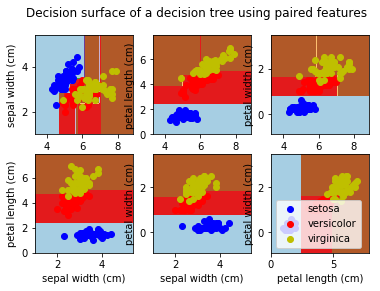

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()

#change below for question 2 (at least part of answer)
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier()#should be stuff in param's?
    clf.fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show();

**Question 1**. Study the code and try to understand what is happening in each line. Explain what the images plotted by the code show.

<h3>
    <strong>
        The graphs above depict the sections in which the decision tree split the different data points into. As each attribute is looked at in the dataset the decision tree splits the data points/graph further until all the attributes that were selected have been accounted for. 
    </strong>
    </h3>

**Question 2**. Train a decision tree on Iris data set using all 4 attributes. Before training, remember to reserve 50 randomly selected examples for test set and train on the remaining 100 examples. Use the default parameter values (no need to put anything in parenthesis in `DecisionTreeClassifier`). How long did it take to train the decision tree? Report the accuracy on the test set. Print the confusion matrix. Report the accuracy on the training set. Discuss if you are seeing any difference and why. Compare the accurracy with the accuracy you got with kNN. Report on the size of the resulting tree (how many nodes are there and what is the depth of the tree). Visualize the tree (consider using `sklearn.tree.export_graphviz`).

In [3]:
#Question 2

from sklearn.metrics import confusion_matrix
import time
from sklearn import tree
from sklearn.model_selection import train_test_split


X = iris.data[:,[0,1,2,3]]
y = iris.target

#get start time
start = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
predictor = DecisionTreeClassifier()
c = predictor.fit(X, y)

#get end time
end = time.time()
timeElapsed = end - start
print "The decision tree took", timeElapsed , "to train"
print

test_acc = predictor.score(X_test,y_test)
print "Testing Accuracy : ", test_acc
print

train_acc = predictor.score(X_train,y_train)
print "Training Accuracy : ", train_acc
print

y_predictor = predictor.fit(X_train, y_train).predict(X_test)

confMatrix = confusion_matrix(y_test, y_predictor)
print confMatrix

tree.export_graphviz(c, out_file='Lab8_output.dot') 

The decision tree took 0.00246286392212 to train

Testing Accuracy :  1.0

Training Accuracy :  1.0

[[20  0  0]
 [ 0 12  2]
 [ 0  3 13]]


<h3>
<strong>
    It looks like the accuracies are the exact same, I believe this is a result of us training and testing on the same exact data. This is not an efficient way to build a predictor. Furthermore, it illustrates why we should always split the data for training and testing purposes. 
</strong>
</h3>

**Question 3**. Train a decision tree on Iris data, but this time play with the parameters. You can se the detailed list of different choices at http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier. Experiment with `criterion` (default is `gini`, try to train using `entropy`), `max_depth` (try to set it to 2, 3, 4), `min_samples_leaf` (default is 1, try with 5, 15). See if you can find a combination of parameters that improves accuracy on the test set. Report what you found.

In [4]:
X = iris.data[:, [0,1,2,3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
predictor = DecisionTreeClassifier(criterion ='entropy')
cust = predictor.fit(X, y)

accuracyTest = predictor.score(X_test, y_test)
print "Testing Accuracy : ", accuracyTest
print

accuracyTrain = predictor.score(X_train, y_train)
print "Training Accuracy : ", accuracyTrain
print

Testing Accuracy :  1.0

Training Accuracy :  1.0



In [5]:
#notes from lab
#the accuracy should be higher on the training set than on the test set
#

## Lab 8.B. Doing supervised learning on churn data set (50 points)

In this part of the lab, you will be using kNN and decision trees on the problem of churn prediction. 

In [6]:
import pandas as pd
#data set from yhathq: http://blog.yhathq.com/posts/predicting-customer-churn-with-sklearn.html
dfchurn=pd.read_csv("https://raw.githubusercontent.com/CIS3715-temple-2018/CIS3715-temple-2018.github.io/master/churn.csv")
dfchurn.head(25)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


This is a dataset from a telecom company, of their customers. Based on the recorded attributes of these customers and their calling plans, we want to predict if a customer is likely to leave the company (the last column in the table). This is expensive for the company, as a lost customer means lost monthly revenue.

**Question 4**. Perform EDA on the data set to get an insight into the data, including answering what fraction of customers left the company, what are attributes about, what are their properties, how are attributes and the churn related. Prepare 1-2 page document summarizing the interesting aspects of the data.

Shape of churn:  (3333, 16)
Size of churn:  53328



<Figure size 720x360 with 0 Axes>

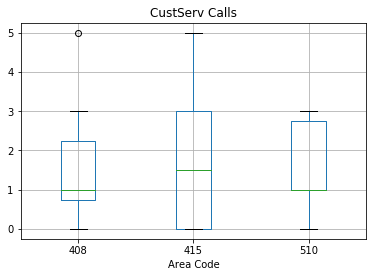

<Figure size 720x360 with 0 Axes>

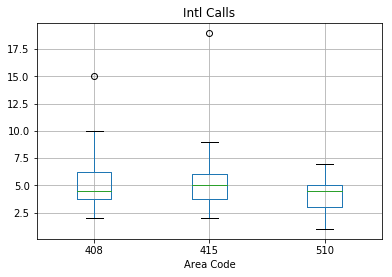

<Figure size 720x360 with 0 Axes>

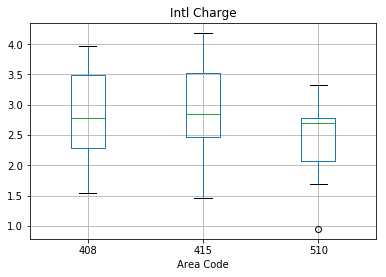

<Figure size 720x360 with 0 Axes>

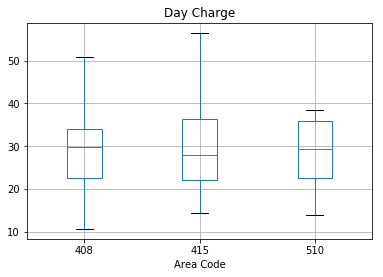

<Figure size 720x360 with 0 Axes>

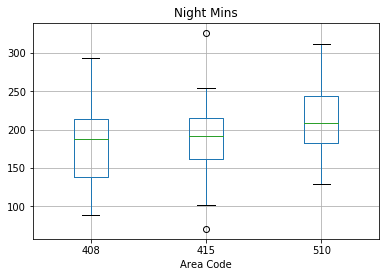

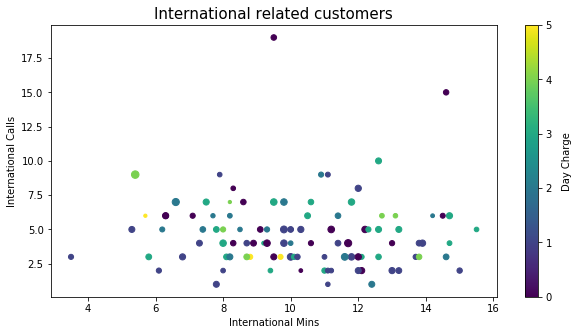

In [7]:
from __future__ import division

dfchurn.dtypes
wholeDataset = dfchurn.select_dtypes(include=['int64', 'float64']).copy()

print"Shape of churn: ", wholeDataset.shape
print"Size of churn: ", wholeDataset.size
print

plt.figure(figsize=(10,5))
dfchurn[:50].boxplot(column='CustServ Calls',by='Area Code');
plt.suptitle("");
plt.show();
print

plt.figure(figsize=(10,5))
dfchurn[:50].boxplot(column='Intl Calls',by='Area Code');
plt.suptitle("");
plt.show();
print


plt.figure(figsize=(10,5))
dfchurn[:50].boxplot(column='Intl Charge',by='Area Code');
plt.suptitle("");
plt.show();
print

plt.figure(figsize=(10,5))
dfchurn[:50].boxplot(column='Day Charge',by='Area Code');
plt.suptitle("");
plt.show();
print

plt.figure(figsize=(10,5))
dfchurn[:50].boxplot(column='Night Mins',by='Area Code');
plt.suptitle("");
plt.show();
print

plt.figure(figsize=(10,5))
plt.scatter(dfchurn[:100]['Intl Mins'],dfchurn[:100]['Intl Calls'],dfchurn[:100]['Day Charge'],dfchurn[:100]['CustServ Calls']);
plt.title('International related customers', fontsize=15);
plt.xlabel('International Mins')
plt.ylabel('International Calls')
cbar = plt.colorbar()
cbar.set_label("Day Charge", labelpad=+10)
plt.show(); 

**Question 5**. Train and test a kNN classifier. First, select 1,000 random customers and save them for testing. You can use the remaining ones for training. Then, you will need to decide what to do with the categorical attributes. The easiest is to simply ignore them, but it would reduce your accuracy. A better way (you have to try it) is to convert the categorical attributes to numbers. It is up to you to decide what distance measure to use, how to pick `k`, and make any other decision that will help you increase the accuracy. For example, it might help you to scale the attributes to the same range. Remember that any transformation you do on the training data needs to be repeated on the test data. Report on the best accuracy you are able to get (please do not forget to split the data into training and test before proceeding). Also report the confusion matrix. Provide a discussion of your choices.

In [8]:
from random import sample
from sklearn import neighbors 

wholeDataset5 = dfchurn.select_dtypes(include=['int64', 'float64']).copy()

custRand = np.array(sample(xrange(len(wholeDataset5)), 1000))
print "The shape of Churn Random: ", custRand.shape
print

custSet = np.array(sample(xrange(len(dfchurn['Churn?'])), 1000))
print "The shape of Churn Random Labels: ", custSet.shape
print

custTraining = []
for i in range(0,len(dfchurn['Churn?'])):
    if i not in custSet:
        custTraining.append(i)
        
Z_Train = []
for i in range(0,len(wholeDataset5)):
    if i not in custRand:
        Z_Train.append(i)
        
testingSet = np.array(dfchurn['Churn?'])[custSet]
trainingSet = np.array(dfchurn['Churn?'])[Z_Train]
X_test = np.array(wholeDataset5)[custRand]
y_test = testingSet

X_train = np.array(wholeDataset5)[Z_Train]
y_train = trainingSet
print 'The shape of x train: ', X_train.shape
print

#kNN start
custPredictor = neighbors.KNeighborsClassifier(n_neighbors = 27, weights = 'uniform', metric = 'cosine')
custPredictor.fit(X_train, y_train);
custAccuracy = custPredictor.score(X_test, y_test)

print "The Accuracy of Churn: ", custAccuracy
print

y_predictor = custPredictor.fit(X_train, y_train).predict(X_test)
confM = confusion_matrix(y_test, y_predictor)
print "The Confusion Matrix: "
print confM

The shape of Churn Random:  (1000,)

The shape of Churn Random Labels:  (1000,)

The shape of x train:  (2333, 16)

The Accuracy of Churn:  0.83

The Confusion Matrix: 
[[828  29]
 [141   2]]


**Question 6**. Train and test a decision tree. Do it on the same traning-test split you used in *Question 5*. Your goal is to try to figure out the best way to train an accurate decision tree. Report on your findings. Compare your results with the kNN results.

In [9]:
wholeDataset6 = dfchurn.select_dtypes(include=['int64', 'float64']).copy()

testPredictor = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 200, min_samples_leaf = 100)

clf = testPredictor.fit(wholeDataset6, dfchurn['Churn?'])

testAccuracy = testPredictor.score(X_test, y_test)
print "The Testing Accuracy : ", testAccuracy
print

trainingAccuracy = testPredictor.score(X_train, y_train)
print "The Training Accuracy : ", trainingAccuracy
print

The Testing Accuracy :  0.79

The Training Accuracy :  0.8954136305186455



**Question 7**. Lets assume you have to use your churn classifier to contact your existing customers and try to prevent churn. The cost of each contact is 10. Let us assume each contacted customer will decide to stay. Your profit in keeping a customer is 30. Given your best decision tree and kNN classifiers, what is the expected profit on your test data? Can you try to train another classifier that would have even larger profit?

In [1]:
numOfCust = len(df)
print "The Total Number of Customers: ", numOfCust
print
print "kNN"
print

prof = (numOfCust*custAccuracy)*30 #𝑌𝑜𝑢𝑟𝑝𝑟𝑜𝑓𝑖𝑡𝑖𝑛𝑘𝑒𝑒𝑝𝑖𝑛𝑔𝑎𝑐𝑢𝑠𝑡𝑜𝑚𝑒𝑟𝑖𝑠 = 30
print "The Profit: ", prof

cost = (numOfCust)*(1 - custAccuracy)*10 #Cost = 10
print "The cost: ", cost
remainProf = prof - cost
print

print "The Remain Profit (kNN): ", remainProf
print "___________________________________"
print

print "Decision Tree"
print

profTree = (numOfCust*testAccuracy)*30 # 𝑌𝑜𝑢𝑟𝑝𝑟𝑜𝑓𝑖𝑡𝑖𝑛𝑘𝑒𝑒𝑝𝑖𝑛𝑔𝑎𝑐𝑢𝑠𝑡𝑜𝑚𝑒𝑟𝑖𝑠 = 30
print "The Profit: ", profTree

# Cost = 10
costTree = (numOfCust)*(1 - testAccuracy)*10
print "The Cost: ", costTree

remainPTree = profTree - costTree
print

print "The Remain Profit (decision tree): ", remainPTree
print "___________________________________"
print

print "Random Forest"
print

from sklearn.ensemble import RandomForestClassifier

predictorRandF = RandomForestClassifier()
clf = predictorRandF.fit(wholeDataset6, dfchurn['Churn?'])

RFaccuracy = predictorRandF.score(X_test,y_test)
print "The Accuracy of Random Forest Testing: ", RFaccuracy
print

profRandF = (numOfCust*RFaccuracy)*30 # 𝑌𝑜𝑢𝑟𝑝𝑟𝑜𝑓𝑖𝑡𝑖𝑛𝑘𝑒𝑒𝑝𝑖𝑛𝑔𝑎𝑐𝑢𝑠𝑡𝑜𝑚𝑒𝑟𝑖𝑠 = 30
print "The Profit: ", profRandF

costRandF = (numOfCust)*(1 - RFaccuracy)*10 # Cost = 10
print "The Cost: ", costRandF
print

RemainPRandF = profRandF - costRandF;
print "Total profit using decision tree: ", RemainPRandF;

NameError: name 'df' is not defined